In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set(style="whitegrid", color_codes=True)
from sklearn import preprocessing

In [2]:
df= pd.read_csv('adult.csv')

In [3]:
df.shape

(48842, 15)

In [4]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df=df.replace('?',np.nan)

In [6]:
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.73 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation         5.75 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.75 %
income              0.0 %
dtype: object

In [7]:
columns_with_nan = ['workclass', 'occupation', 'native-country']

In [8]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass          0.0 %
fnlwgt             0.0 %
education          0.0 %
educational-num    0.0 %
marital-status     0.0 %
occupation         0.0 %
relationship       0.0 %
race               0.0 %
gender             0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country     0.0 %
income             0.0 %
dtype: object

In [11]:
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,36705,NaN,15784,NaN,22379,8981,19716,41762,32650,NaN,NaN,NaN,44689,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

finding the outliers


In [15]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['capital-gain'])

Outliers: [99999, 27828, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 27828, 25236, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 41310, 99999, 99999, 34095, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 27828, 27828, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 27828, 25124, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 25236, 99999, 27828, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 25236, 27828, 27828, 27828, 27828, 99999, 27828, 99999, 99999, 99999, 99999, 27828, 99999, 27828, 25124, 99999, 99999, 99999, 99999, 27828, 34095, 25236, 99999, 99999, 99999, 99999, 25124, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 34095, 99

In [16]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['age'])

Outliers: [80, 90, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 81, 80, 88, 87, 90, 83, 80, 90, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 81, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 81, 80, 83, 90, 90, 81, 90, 90, 80, 90, 90, 84, 90, 80, 90, 81, 83, 84, 81, 85, 82, 80, 90, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 90, 82, 81, 90, 84, 81, 82, 81, 80, 90, 80, 84, 82, 90, 84, 90, 83, 81, 80, 80, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 80, 82, 85, 80, 90, 81, 80, 81, 82, 88, 90, 82, 88, 84, 83, 86, 90, 90, 82, 83, 81, 90, 80, 81, 84, 84, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


In [17]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['capital-loss'])

Outliers: [1721, 1876, 2415, 1887, 1887, 1887, 1887, 1977, 2057, 1429, 1590, 2057, 1721, 1887, 1485, 1485, 1977, 1887, 1721, 1887, 2051, 2377, 1672, 1628, 1902, 1672, 1602, 1902, 1590, 1977, 1741, 1887, 2444, 1876, 1902, 1408, 1902, 2001, 2001, 2415, 2042, 1740, 1876, 1825, 1902, 1887, 1977, 1887, 1902, 1887, 1902, 2415, 1848, 1719, 3004, 1590, 1977, 1887, 1977, 2001, 1902, 1977, 2179, 1902, 1573, 1429, 2205, 1977, 2339, 1887, 2339, 1726, 2258, 1672, 1590, 1887, 1340, 2415, 1602, 1504, 1887, 2415, 2559, 1977, 1848, 2258, 1902, 1887, 1668, 1974, 1977, 1741, 2205, 1980, 2051, 2377, 1902, 2444, 1564, 1408, 1902, 1977, 2547, 1902, 2002, 2057, 2001, 1977, 1977, 1628, 1902, 1876, 1848, 1719, 1669, 1902, 1902, 2339, 1902, 2339, 1902, 1887, 1902, 1887, 1719, 1429, 2001, 1485, 1902, 1980, 1504, 1887, 1902, 1977, 1617, 1741, 2051, 2205, 1980, 1902, 1887, 2205, 1721, 1602, 1573, 1977, 2415, 3175, 1668, 2472, 1669, 1602, 2057, 1504, 2174, 1902, 1902, 1579, 1902, 1741, 1902, 1902, 1579, 1590, 1977,

In [18]:
df['capital-loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754],
      dtype=int64)

In [19]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['hours-per-week'])

Outliers: [90, 84, 80, 84, 80, 99, 80, 80, 96, 90, 3, 1, 99, 80, 80, 84, 99, 99, 2, 2, 78, 80, 99, 84, 80, 3, 80, 80, 80, 99, 92, 3, 80, 84, 99, 80, 84, 85, 1, 99, 2, 84, 80, 99, 98, 80, 84, 96, 99, 80, 90, 78, 84, 80, 90, 80, 86, 80, 84, 80, 99, 80, 85, 80, 80, 80, 80, 3, 2, 80, 84, 99, 80, 84, 2, 99, 99, 99, 99, 90, 80, 80, 96, 2, 84, 99, 99, 90, 99, 80, 88, 2, 80, 80, 90, 79, 78, 84, 2, 80, 80, 84, 3, 1, 84, 99, 89, 98, 80, 80, 90, 3, 80, 99, 80, 78, 2, 99, 99, 80, 80, 2, 80, 80, 99, 80, 99, 99, 80, 80, 90, 80, 78, 84, 3, 80, 80, 1, 80, 99, 99, 99, 80, 99, 80, 88, 3, 90, 3, 80, 85, 84, 3, 98, 80, 99, 84, 2, 80, 99, 99, 1, 2, 99, 96, 84, 99, 80, 1, 99, 99, 2, 99, 1, 84, 80, 90, 3, 2, 99, 99, 3, 85, 99, 3, 3, 99, 3, 80, 80, 99, 2, 99, 99, 80, 80, 99, 99, 2, 80, 2, 80, 86, 80, 3, 80, 2, 84, 3, 80, 80, 3, 84, 99, 80, 99, 80, 84, 99, 2, 80, 3, 80, 2, 80, 99, 2, 80, 90, 84, 92, 80, 80, 99, 80, 3, 84, 84, 80, 90, 80, 80, 80, 2, 2, 1, 98, 80, 80, 80, 99, 2, 1, 80, 80, 99, 80, 1, 80, 78, 90,

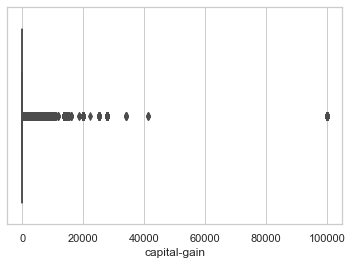

In [20]:
sb.boxplot(df['capital-gain'])

In [21]:
income = df['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    76.07 %
>50K     23.93 %
Name: income, dtype: object

In [22]:
### we find outliers only in captail-gain ,capital gain >40000 is very rare because most of them have salary less than or equal to 50


df.drop(df[ df['capital-gain'] > 40000 ].index,inplace=True)
df.shape

(48595, 15)

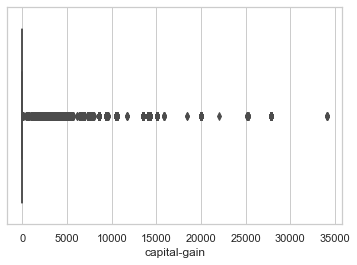

In [23]:
sb.boxplot(df['capital-gain'])

Visualization
Separating the Categorical and Numerical data

In [24]:
numerical=df.select_dtypes(include=["int64"]).keys()
numerical

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

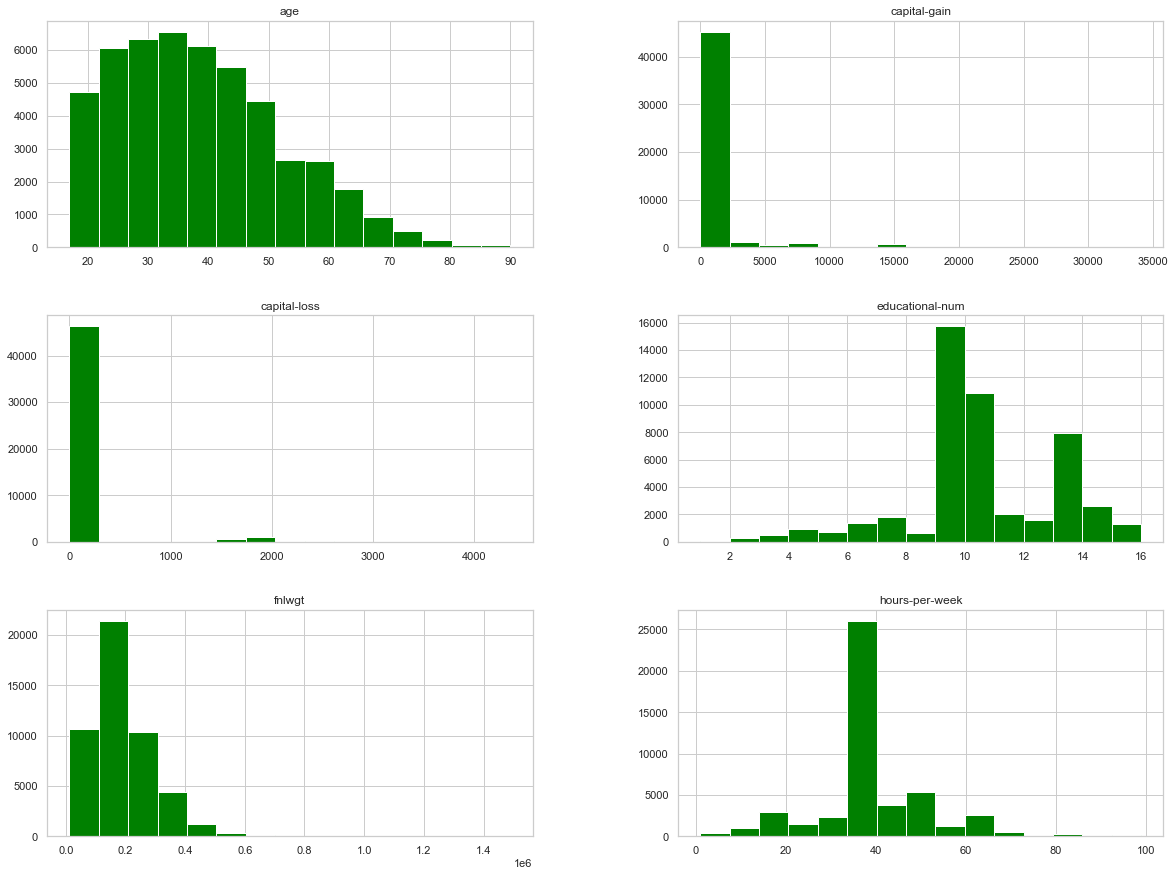

In [25]:
df.hist(bins=15, figsize=(20,15), color = 'green')
plt.show()

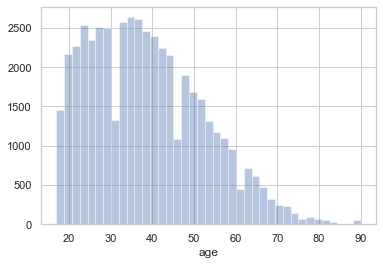

In [26]:
sb.distplot(df['age'].dropna(), kde=False, bins = 39)

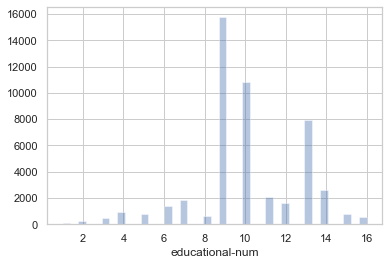

In [27]:
sb.distplot(df['educational-num'].dropna(), kde=False, bins = 39)

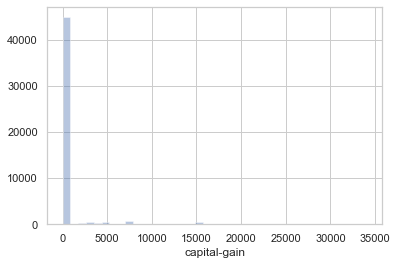

In [28]:
sb.distplot(df['capital-gain'].dropna(), kde=False, bins = 39)

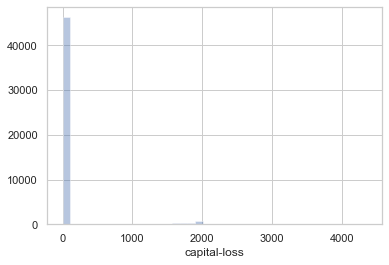

In [29]:
sb.distplot(df['capital-loss'].dropna(), kde=False, bins = 39)

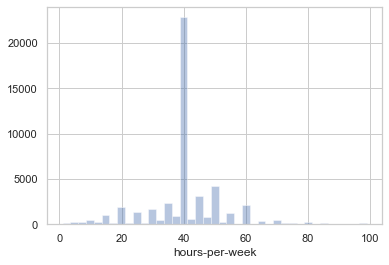

In [30]:
sb.distplot(df['hours-per-week'].dropna(), kde=False, bins = 39)

categorial

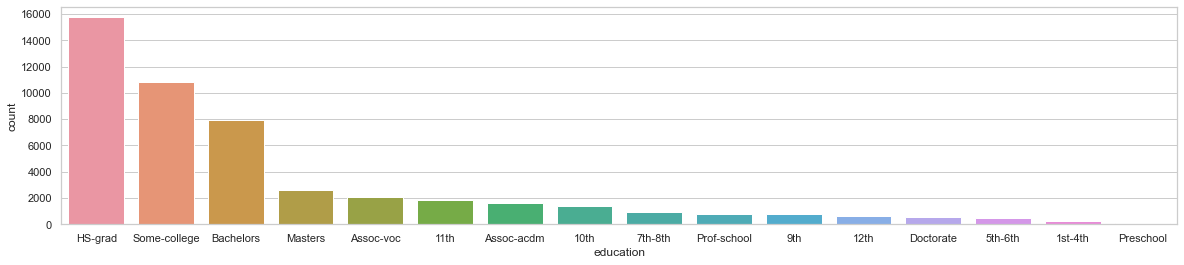

In [31]:
plt.figure(figsize=(20, 4))

sb.countplot(df['education'].dropna(), order = df['education'].value_counts().index);

In [32]:
categorical = df.select_dtypes(include = ["object"]).keys()
categorical

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

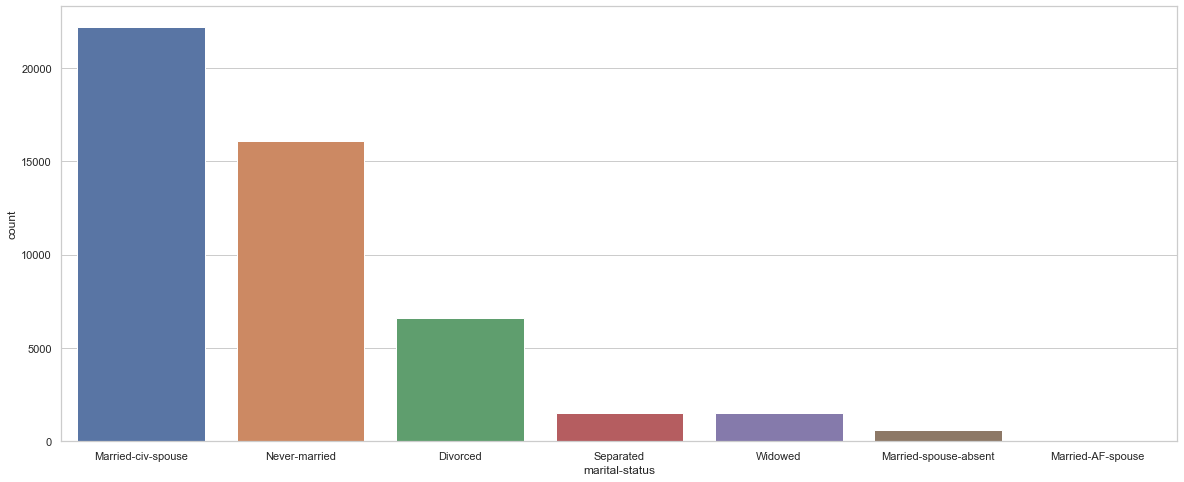

In [33]:
plt.figure(figsize=(20, 8))

sb.countplot(df['marital-status'].dropna(), order = df['marital-status'].value_counts().index);

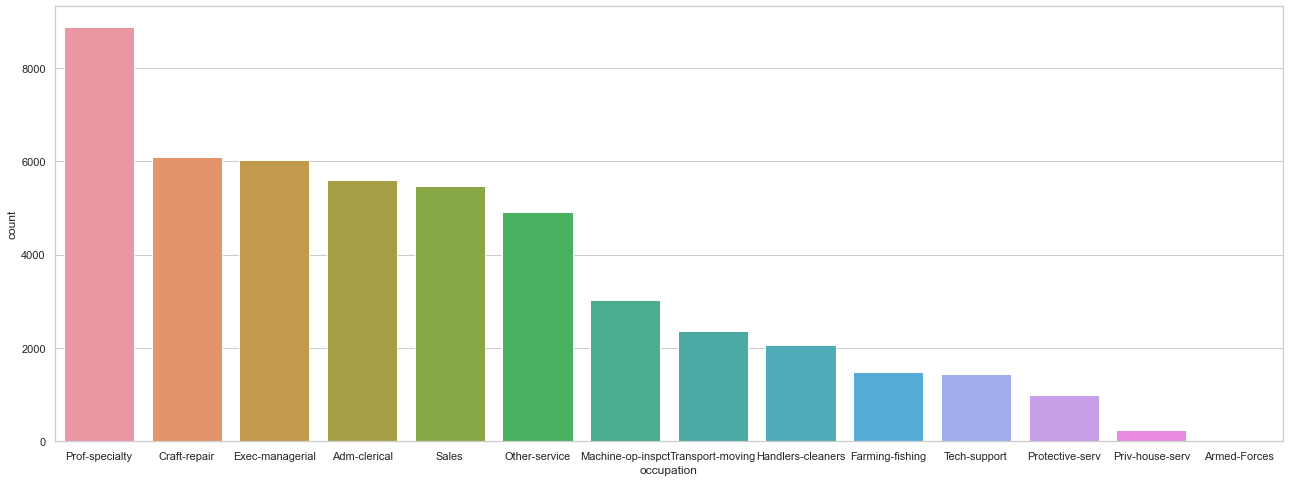

In [34]:
plt.figure(figsize=(22, 8))

sb.countplot(df['occupation'].dropna(), order = df['occupation'].value_counts().index);

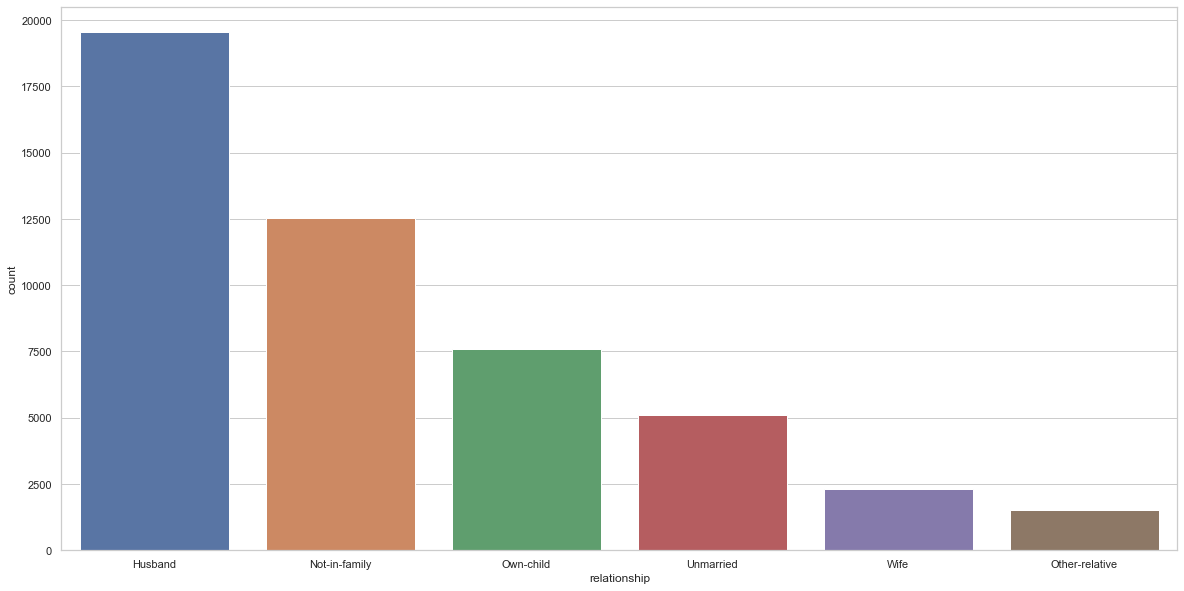

In [35]:
plt.figure(figsize=(20, 10))

sb.countplot(df['relationship'].dropna(), order = df['relationship'].value_counts().index);

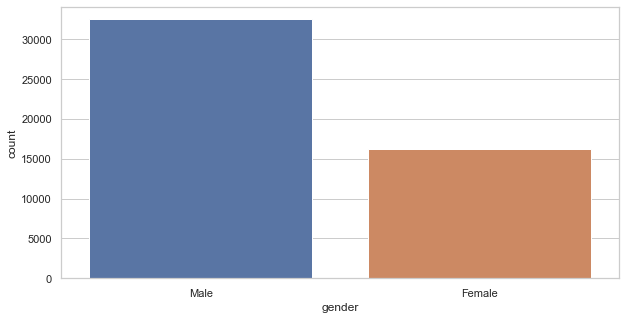

In [36]:
plt.figure(figsize=(10, 5))

sb.countplot(df['gender'].dropna(), order = df['gender'].value_counts().index);

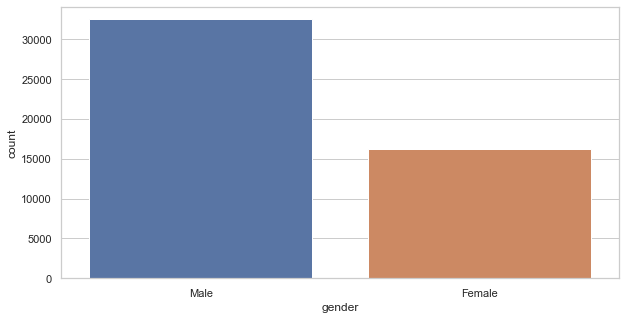

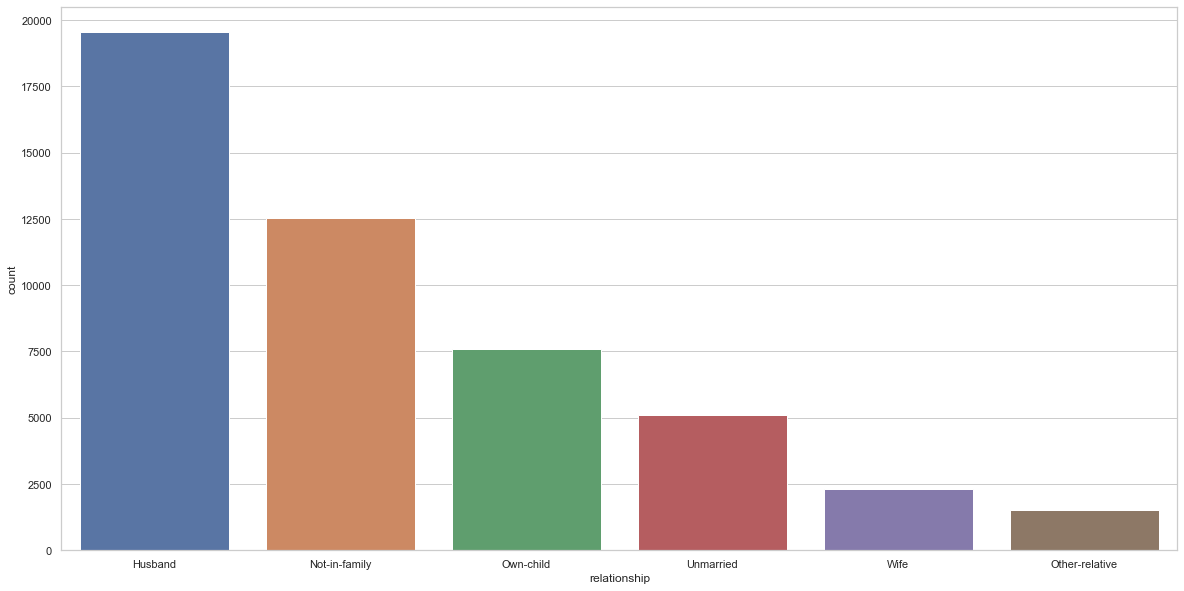

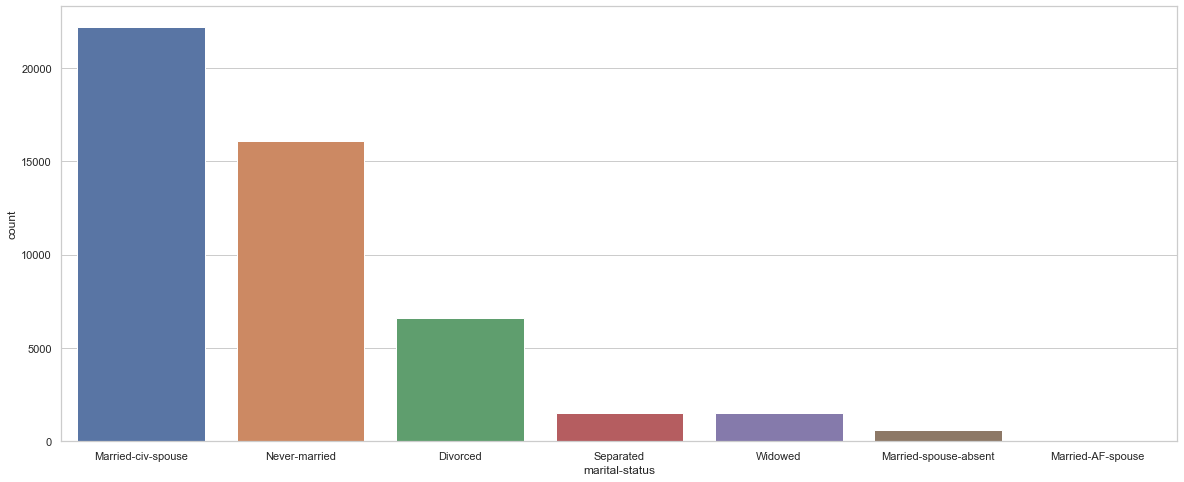

In [37]:
plt.figure(figsize=(10, 5))

sb.countplot(df['gender'].dropna(), order = df['gender'].value_counts().index);

plt.figure(figsize=(20, 10))

sb.countplot(df['relationship'].dropna(), order = df['relationship'].value_counts().index);

plt.figure(figsize=(20, 8))

sb.countplot(df['marital-status'].dropna(), order = df['marital-status'].value_counts().index);

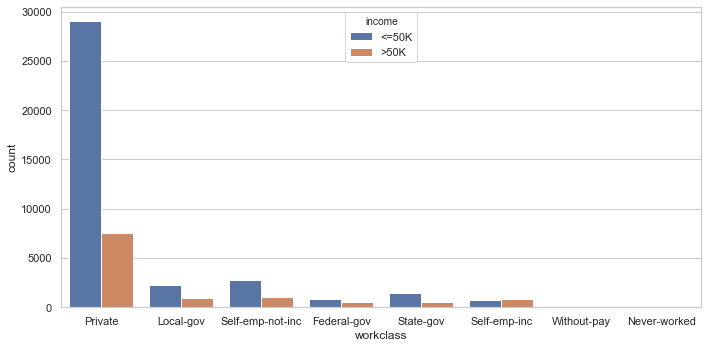

In [38]:
fig = plt.figure(figsize=(10,5))
sb.countplot('workclass', hue='income', data=df)
plt.tight_layout()
plt.show()

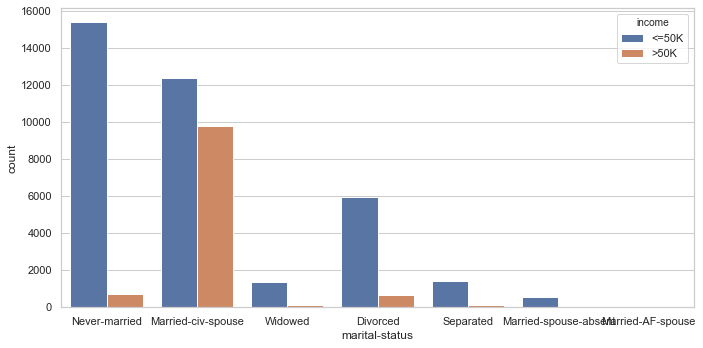

In [39]:
fig = plt.figure(figsize=(10,5))
sb.countplot('marital-status', hue='income', data=df)
plt.tight_layout()
plt.show()

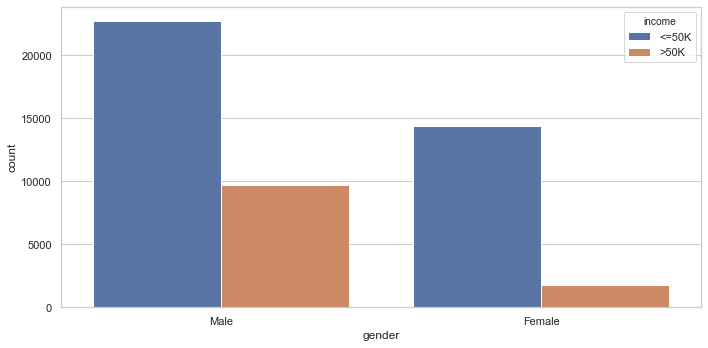

In [40]:
fig = plt.figure(figsize=(10,5))
sb.countplot('gender', hue='income', data=df)
plt.tight_layout()
plt.show()

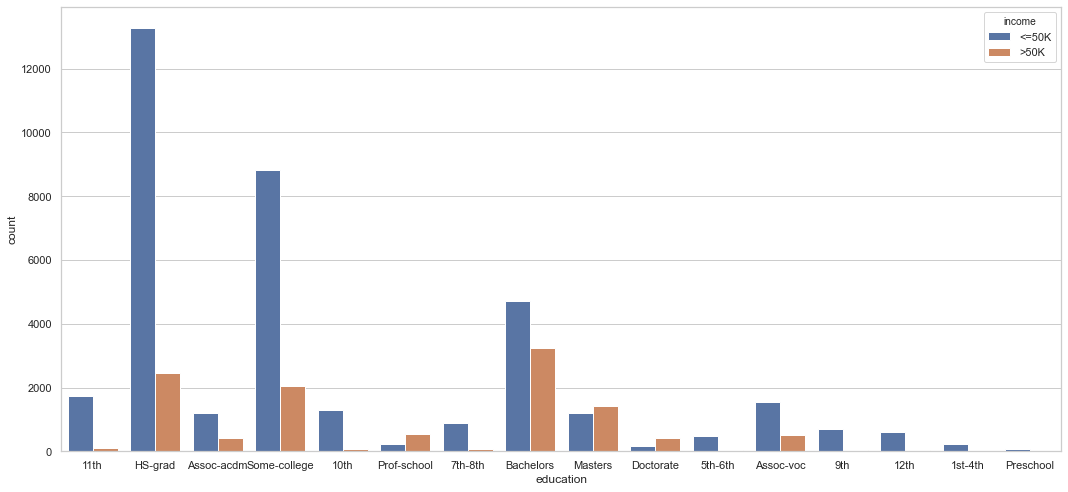

In [41]:
fig = plt.figure(figsize=(15,7))
sb.countplot('education', hue='income', data=df)
plt.tight_layout()
plt.show()

### HEXBIN PLOT :--

A hexbin plot is useful to represent the relationship of 2 numerical variables when you have a lot of data points. Without overlapping of the points, the plotting window is split into several hexbins. The color of each hexbin denotes the number of points in it. This can be easily done using the hexbin() function of matplotlib. Note that you can change the size of the bins using the gridsize argument. 

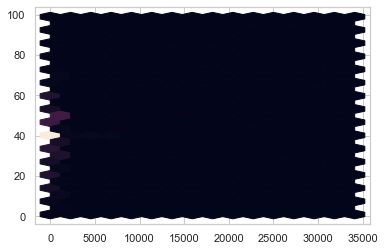

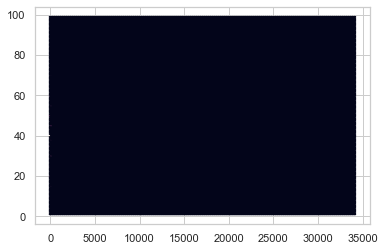

In [42]:

x= df['capital-gain']
y= df['hours-per-week']
 
# Make the plot
plt.hexbin(x, y, gridsize=(15,15) )
plt.show()
 
# We can control the size of the bins:
plt.hexbin(x, y, gridsize=(150,150) )
plt.show()

ax = sb.swarmplot(x="educational-num", y="age", data=df)

In [43]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076617,0.027210,0.114328,0.057726,0.069919
fnlwgt,-0.076617,1.000000,-0.038856,-0.003841,-0.004412,-0.013932
educational-num,0.027210,-0.038856,1.000000,0.146414,0.082698,0.139017
capital-gain,0.114328,-0.003841,0.146414,1.000000,-0.050169,0.082599
capital-loss,0.057726,-0.004412,0.082698,-0.050169,1.000000,0.055620
hours-per-week,0.069919,-0.013932,0.139017,0.082599,0.055620,1.000000


#### CONCLUSION:-


 
 
 ##### AT LAST, BY OBVERSING AND ANALYSIS, "PROF-SPECIALTY" IS HAVING MORE NO.OF COUNT IN BOTH MALE AND FEMALE.

In [44]:
numerical=df.select_dtypes(include=["int64"]).keys()
numerical

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [45]:
capital_gain = preprocessing.scale(df['capital-gain'])

print(capital_gain)

[-0.23044397 -0.23044397 -0.23044397 ... -0.23044397 -0.23044397
  5.73990111]


In [46]:
capital_loss = preprocessing.scale(df['capital-loss'])

print(capital_loss)

[-0.21770429 -0.21770429 -0.21770429 ... -0.21770429 -0.21770429
 -0.21770429]


In [47]:
hours_per_week = preprocessing.scale(df['hours-per-week'])

print(hours_per_week)

[-0.02999964  0.77855982 -0.02999964 ... -0.02999964 -1.64711856
 -0.02999964]


In [48]:
dumydata=pd.get_dummies(df, columns=["workclass", "education", "marital-status", "occupation"])
dumydata

,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,Own-child,Black,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,Husband,White,Male,0,0,50,United-States,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,Husband,White,Male,0,0,40,United-States,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,Husband,Black,Male,7688,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,10,Own-child,White,Female,0,0,30,United-States,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Wife,White,Female,0,0,38,United-States,...,0,0,0,0,0,0,0,0,1,0
48838,40,154374,9,Husband,White,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
48839,58,151910,9,Unmarried,White,Female,0,0,40,United-States,...,0,0,0,0,0,0,0,0,0,0
48840,22,201490,9,Own-child,White,Male,0,0,20,United-States,...,0,0,0,0,0,0,0,0,0,0


In [49]:
dumydata=dumydata.drop(columns=["relationship","race","native-country"])

In [50]:
df.income

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48595, dtype: object

In [51]:
def sex_to_numeric(x):
 if x=='Male':
     return 1
 if x=='Female':
     return 0

dumydata['gender'] = dumydata['gender'].apply(sex_to_numeric)

In [52]:
x= dumydata.drop(['income'],axis=1)

In [53]:
x

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,1,0,0,40,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,1,7688,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,10,0,0,0,30,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,154374,9,1,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,201490,9,1,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y= dumydata['income']

In [55]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48595, dtype: object

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model= LogisticRegression()

In [60]:
model.fit(x,y)

LogisticRegression()

In [61]:
lr_score =  model.score(x,y)*100 
lr_score

79.68926844325549

In [62]:
model.coef_

array([[-7.55264156e-03, -3.66606362e-06, -1.74333576e-03,
         1.30599078e-05,  3.47783811e-04,  7.72827882e-04,
        -8.13185986e-03,  1.41085247e-05,  1.69093581e-07,
        -2.87281676e-07, -3.79655330e-04,  3.85979448e-05,
        -2.26459908e-05, -9.23543343e-06, -5.80635048e-07,
        -3.65702060e-05, -5.11135958e-05, -1.62569030e-05,
        -6.19763453e-06, -1.18537946e-05, -2.68338036e-05,
        -2.05159338e-05, -6.10224808e-06, -1.44460157e-05,
         9.59514059e-05,  2.58737175e-05, -2.55294983e-04,
         6.76924791e-05, -2.21203601e-06,  3.22521066e-05,
        -1.33901663e-04, -1.66404299e-04,  3.02160912e-07,
         3.75556959e-04, -1.50156474e-05, -4.70300531e-04,
        -4.02515153e-05, -4.34162346e-05, -1.03101076e-04,
         1.65484798e-07, -4.75535402e-05,  1.13336195e-04,
        -3.75577931e-05, -5.20991999e-05, -5.84461609e-05,
        -1.47846257e-04, -7.83205119e-06,  2.30281678e-05,
         5.19599481e-06, -2.19046328e-05, -6.88624779e-0

In [63]:
model.intercept_

array([-0.00035953])

In [64]:
model.predict(X_test)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
dtc_score = dt.score(X_test, y_test)*100
dtc_score

82.07270686537382

In [68]:
sc = pd.DataFrame([{'LogisticRegression':lr_score,'DecisionTreeClassifier':dtc_score}],index=['Score'])
sc

,LogisticRegression,DecisionTreeClassifier
Score,79.689268,82.072707
